## Question 2 Analysis 1

In [4]:
import os

## Importing data from the archives

In [5]:
import json, requests
from pprint import pprint
url = 'http://api.nytimes.com/svc/archive/v1/2015/1.json?api-key=153267972f774925a35583656ae8905d';

resp = requests.get(url)
data = json.loads(resp.text)

with open('Jan-2015.json', 'w') as outfile:
    json.dump(data, outfile)

## Importing data for the article

In [144]:
import json, requests
from pprint import pprint
url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?fq=Trump&facet_field=day_of_week&begin_date=20150101&end_date=20170301&api-key=ca628b68e0ef4515844dc2e15d27a5e3';

resp = requests.get(url)
art_data = json.loads(resp.text)

with open('Trump.json', 'w') as outfile:
    json.dump(art_data, outfile)


In [63]:
for key in art_data:
    print(key)

status
copyright
response


In [136]:
for key in data["response"]:
    print(key)

docs
meta


## Creating the folder structure according to the date

In [116]:
import json
files = glob.glob(r"C:\\Users\mites\Desktop\PYTHON\Midterm\Data\NYT\*")
list = []
for file in files:     #for loop to read every file of the corpus
    with open(file, 'r') as f:   #open files
        json_file = json.load(f)  #loading the files
        json_keys = json_file.keys()
        for keys in json_keys: 
            if keys == 'response':  #searching for the term'response'
                response_file = json_file['response']
                response_keys = response_file.keys()
                for resk in response_keys:
                    if resk == 'docs':  #searching for the term 'docs'
                        docs_file = json_file['response']['docs']
                        i = 0
                        for doc in docs_file:
                            pub_date = json_file['response']['docs'][i]['pub_date'][0:10]   #iterating through all the dictonaries inside a file
                            id = json_file['response']['docs'][i]['_id']
                            if pub_date is not None:  #handling the Nonetype erroe
                                a = pub_date.replace('  ','')  #replacing spaces in the date to create folders
                                g = a.replace(' ','') #replacing spaces in the date to create folders
                                b = g.replace(':','') #replacing colon in the date to create folders
                                d = b.replace('/','') #replacing slash in the date to create folders
                                if d != 'false':
                                    list.append(pub_date)
                                    pub_date = "DataProcessedNYT\\" + d
                                    presentSection=os.path.isdir(pub_date) #checking whether the folder is already present
                                    os.makedirs(pub_date, exist_ok=True)    #if folder doesn't exist then create one
                                    with open(pub_date+"\\" + id + '.json', 'w') as outfile:
                                        json.dump(json_file['response']['docs'][i], outfile)                       
                                    i += 1

## To find the top 50 article type printed in NYT from last 2 years

In [143]:
import os, json
frequency={}
path_to_json =r'C:\Users\mites\Desktop\PYTHON\Midterm\Data\NYT'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
for js in json_files:
    with open(os.path.join(path_to_json, js)) as json_file:
        data=json.load(json_file)
        for key in data["response"]["docs"]:
            p=str(key["section_name"]).split()
            for w in p:
                if w not in frequency:
                    frequency[w] = 1
                else:
                    frequency[w] += 1
freqwords=sorted(frequency.items(),  key=lambda x: x[1], reverse=True) # using sorted function to sort the words 
print("Top 50 articles with their number in New York Times from 2015/01/01 to 2017/02/28 are : ")
print(freqwords[:50])

Top 50 articles with their number in New York Times from 2015/01/01 to 2017/02/28 are : 
[('U.S.', 18739), ('World', 17667), ('Sports', 16588), ('Opinion', 15801), ('Arts', 14706), ('Business', 13594), ('Day', 13594), ('N.Y.', 10556), ('/', 10556), ('Region', 10556), ('&', 9448), ('Style', 8973), ('Fashion', 8286), ('Magazine', 5302), ('Death', 4777), ('Notices', 4777), ('Paid', 4777), ('Books', 4047), ('false', 4024), ('Movies', 3819), ('Technology', 3359), ('T', 3354), ('Real', 2513), ('Estate', 2513), ('The', 2326), ('Food', 2309), ('Theater', 2168), ('Travel', 2150), ('Science', 2119), ('Health', 1993), ('Upshot', 1804), ('Now', 1604), ('NYT', 1604), ('Education', 1299), ('Blogs', 1283), ('Corrections', 1128), ('Games', 961), ('Crosswords', 961), ('Your', 790), ('Money', 790), ('Times', 725), ('Insider', 696), ('Multimedia/Photos', 692), ('Universal', 587), ('Learning', 525), ('Network', 522), ('Briefing', 463), ('None', 426), ('Paper', 401), ('Today’s', 401)]


## Exporting the data to CSV file

In [131]:
import csv    # this part of the code is used to put the data into the csv file.
n=0
list(n)
title = ['Section-Rank-Frequency']   # to display the first row of the csv file
with open('section.csv', 'w',newline="") as out:
    writer = csv.writer(out)
    for x in title:
        writer.writerow(x.split("-")) # splits the title into different colums 
    for e in freqwords:
        n=n+1
        writer.writerow(e)

## Plotting the graph for the most popular article type in accordance to the rank

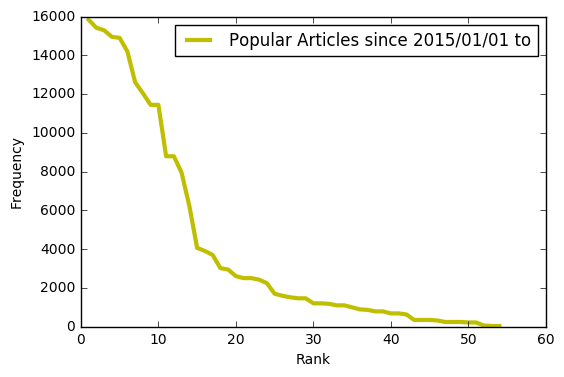

In [132]:
import matplotlib.pyplot as plt
import csv

x = []   # making empty lists
y = []

with open('section.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(csvfile)
    for row in plots:
        x.append(int(row[1]))  #row[1] is the rank column in the excel file
        y.append(int(row[2]))  #row[2] is the frequency column in the excel file

plt.plot(x,y, label="Popular Articles since 2015/01/01 to",color='y',linewidth=3)  # plotting the graph for frequency of words against its rank using log-log
plt.xlabel('Rank') #X-axis label
plt.ylabel('Frequency') #Y-axis label
#plt.title("Zipf's Law")
plt.legend()
plt.show()